# GI Endoscopy Segmentation using MSRF-Net

In [1]:
%load_ext autoreload
%autoreload

In [2]:
import os, os.path as osp

import numpy as np
import imgaug.augmenters as iaa

from deeply.model.msrfnet import (
    MSRFNet
)
from deeply.plots import segplot, history as history_plot
from deeply.datasets.util import split as split_dataset
from deeply.generators import ImageMaskGenerator

from deeply.util.system import makedirs

from deeply.util.image  import augment as augment_images

from deeply._compat import iteritems

import deeply.datasets as dd

import tqdm.notebook as tq

#### Constants

In [3]:
image_size    = (256, 256)
width, height = image_size
batch_size = 1

split_types = ("train", "val", "test")

#### Build Model

In [ ]:
# msrfnet = MSRFNet(x = width, y = height, n_classes = 1)

In [ ]:
msrfnet.plot()

In [4]:
hyper_kvasir, info = dd.load("hyper_kvasir_segmented", with_info = True, as_supervised = True)

2021-09-02 18:32:11.289973: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating data examples...: 0 examples [00:00, ? examples/s]

Shuffling hyper_kvasir_segmented-data.tfrecord...:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset hyper_kvasir_segmented downloaded and prepared to /Users/achilles/tensorflow_datasets/hyper_kvasir_segmented/1.0.0. Subsequent calls will reuse this data.


2021-09-02 18:32:40.306675: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2021-09-02 18:33:27.606936: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


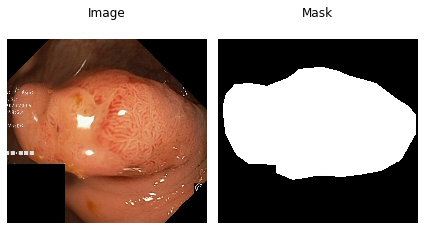

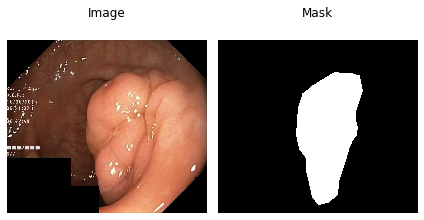

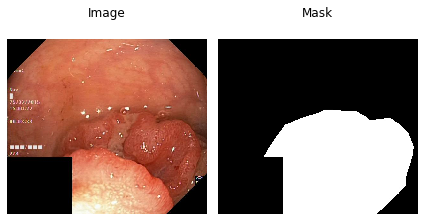

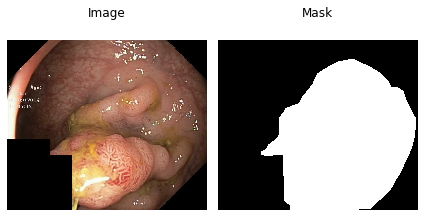

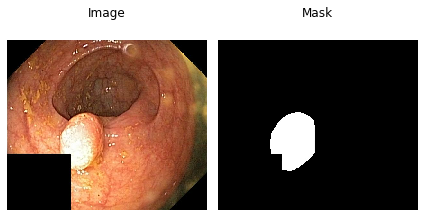

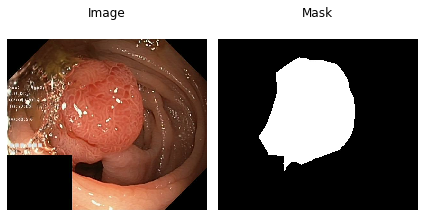

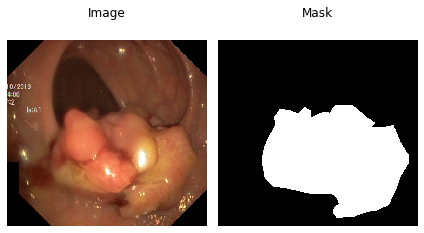

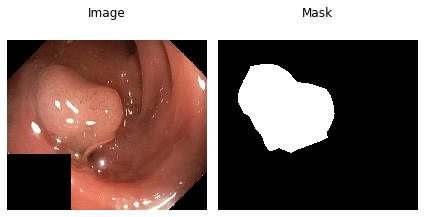

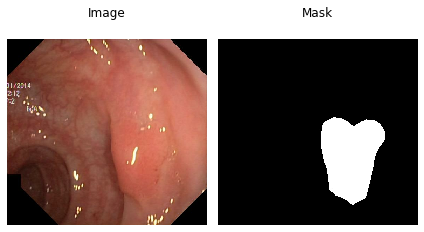

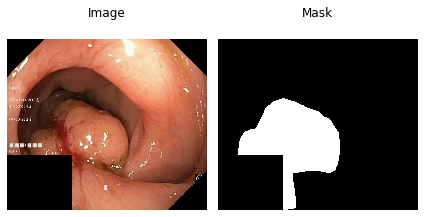

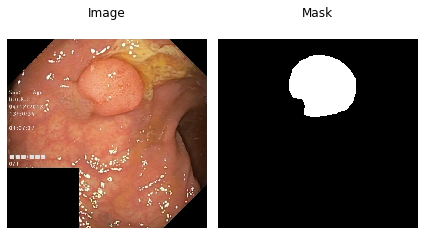

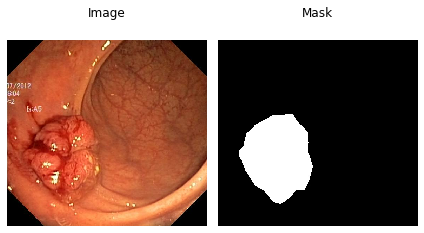

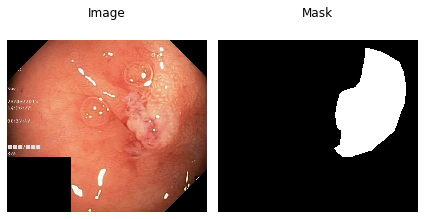

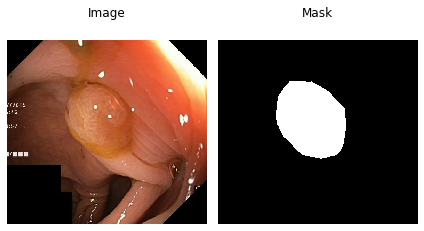

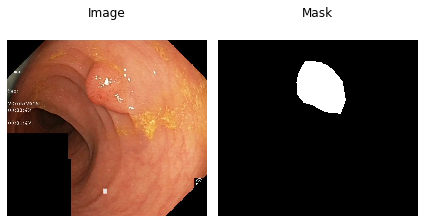

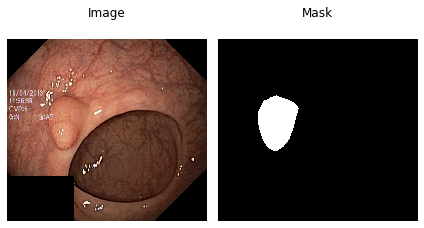

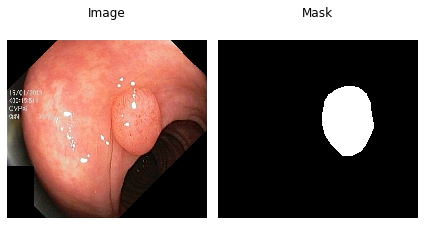

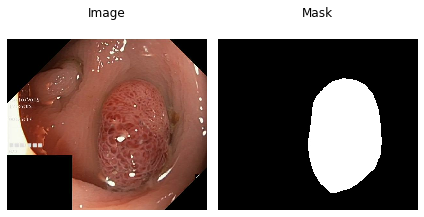

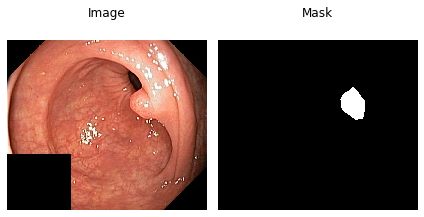

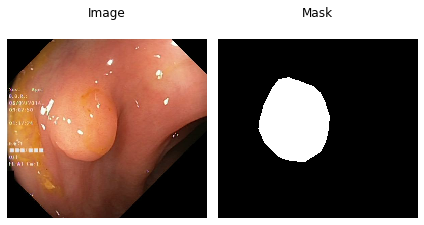

In [8]:
for image, mask in hyper_kvasir["data"].shuffle(30).take(20):
    segplot(image, mask)